In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
uniqueLinks = pd.read_csv('static/unique_links.csv')
uniqueLinks

,start_stop,end_stop,start_sequence,end_sequence,length,mean_speed [km/h],covariance_speed [%],buffer_speed [km/h],mean_time [mins],covariance_time [%],buffer_time [mins],mean_headway [mins],covariance_headway [%],buffer_headway [mins]
0,PF_A15_C,PF_A14_C,1,2,2.6710,40.065000,1.774532e-16,0.0,4.0,0.0,0.0,13.954708,5.889077,9.00
1,PF_A14_C,PF_A13_C,2,3,2.1048,42.096000,1.688916e-16,0.0,3.0,0.0,0.0,13.954708,5.889077,9.00
2,PF_A13_C,PF_A12_C,3,4,1.0988,32.964000,0.000000e+00,0.0,2.0,0.0,0.0,13.954708,5.889077,9.00
3,PF_A12_C,PF_A11_C,4,5,1.4536,29.072000,0.000000e+00,0.0,3.0,0.0,0.0,13.954708,5.889077,9.00
4,PF_A11_C,PF_A10_C,5,6,2.1612,32.418000,2.193121e-16,0.0,4.0,0.0,0.0,13.954708,5.889077,9.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197,PF_N11_C,PF_N10_C,2,3,2.8733,34.479600,0.000000e+00,0.0,5.0,0.0,0.0,40.306034,3.493899,41.85
198,PF_N10_C,PF_N09_C,3,4,2.0799,31.198628,4.425913e-05,0.0,4.0,0.0,0.0,40.306034,3.493899,41.85
199,PF_N09_C,PF_N08_C,4,5,1.7224,34.447983,5.344577e-06,0.0,3.0,0.0,0.0,40.306034,3.493899,41.85
200,PF_N08_C,PF_N07_C,5,6,1.3477,26.954000,5.260984e-16,0.0,3.0,0.0,0.0,41.942149,3.397802,48.00


In [3]:
stops = pd.read_csv('static/stops.csv')
stops

,stop_id,stop_name,stop_desc,stop_lat,stop_lon,zone_id,location_type,parent_station,wheelchair_boarding,level_id
0,STN_N06,WIEHLE-RESTON EAST METRORAIL STATION,NaN,38.947832,-77.340316,91,1,NaN,1,NaN
1,STN_N04,SPRING HILL METRORAIL STATION,NaN,38.929212,-77.241891,90,1,NaN,1,NaN
2,STN_N03,GREENSBORO METRORAIL STATION,NaN,38.921269,-77.234162,89,1,NaN,1,NaN
3,STN_N02,TYSONS METRORAIL STATION,NaN,38.920685,-77.221589,88,1,NaN,1,NaN
4,STN_N01,MCLEAN METRORAIL STATION,NaN,38.924339,-77.210530,87,1,NaN,1,NaN
...,...,...,...,...,...,...,...,...,...,...
2170,NODE_C11_MZ_ESC2_TP,POTOMAC YARD-VT METRORAIL STATION,ESCALATOR/STAIR TO TRACK 2 PLATFORM,38.833957,-77.046516,98,3,STN_C11,0,C11_L2
2171,NODE_C11_MZ_ESC2_BT,POTOMAC YARD-VT METRORAIL STATION,TRACK 2 PLATFROM LEVEL ESCALATOR/STAIR TO MEZZ...,38.833748,-77.046520,98,3,STN_C11,0,C11_L1
2172,NODE_C11_MZ_ESC1_TP,POTOMAC YARD-VT METRORAIL STATION,ESCALATOR/STAIR TO TRACK 1 PLATFORM,38.833967,-77.046281,98,3,STN_C11,0,C11_L2
2173,NODE_C11_MZ_ESC1_BT,POTOMAC YARD-VT METRORAIL STATION,TRACK 1 PLATFROM LEVEL ESCALATOR/STAIR TO MEZZ...,38.833747,-77.046280,98,3,STN_C11,0,C11_L1


In [4]:
# add the start stops and end stops latitudes and longitudes under the columns start_lat, start_lon, end_lat, end_lon

uniqueStops = stops[stops['stop_id'].isin(uniqueLinks['start_stop']) | stops['stop_id'].isin(uniqueLinks['end_stop'])]
uniqueStops.reset_index(drop=True, inplace=True)
uniqueStops = uniqueStops[['stop_id', 'stop_lat', 'stop_lon']]
uniqueStops.columns = ['start_stop', 'start_lat', 'start_lon']
uniqueStops

,start_stop,start_lat,start_lon
0,PF_N06_C,38.947825,-77.340313
1,PF_N04_C,38.929206,-77.241887
2,PF_N03_C,38.921261,-77.234160
3,PF_N02_C,38.920677,-77.221586
4,PF_N01_C,38.924330,-77.210530
...,...,...,...
120,PF_N10_C,38.955791,-77.448201
121,PF_N11_C,38.992062,-77.460695
122,PF_N12_C,39.005192,-77.491434
123,PF_C11_2,38.833191,-77.046492


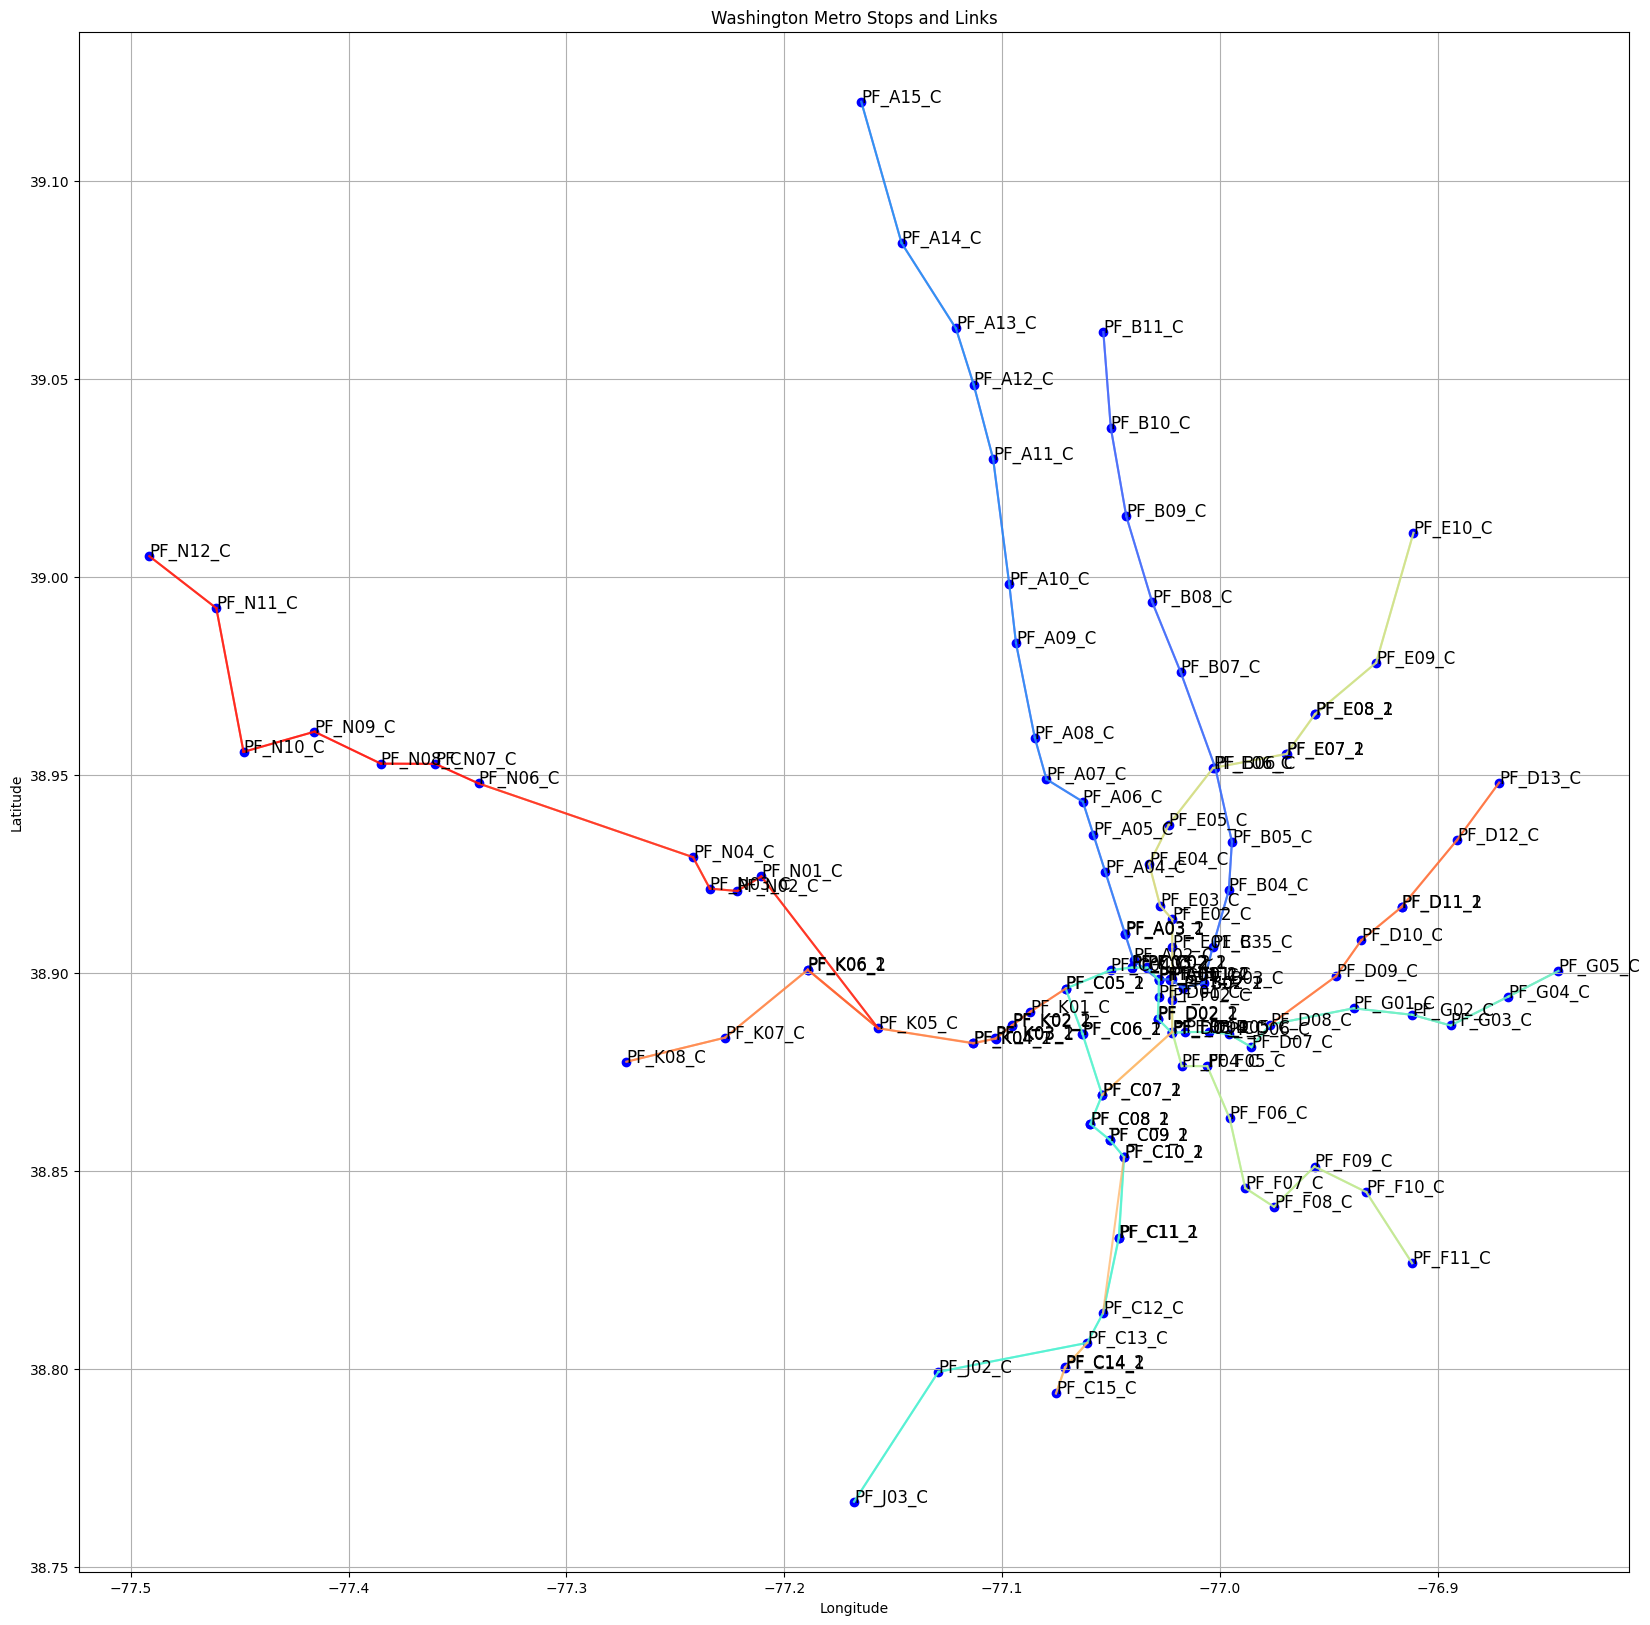

In [5]:
# plot the stops and links
plt.figure(figsize=(20, 20))

# Plot all stops
plt.scatter(uniqueStops['start_lon'], uniqueStops['start_lat'], color='blue', label='Stops')

# Add stop labels
for i, row in uniqueStops.iterrows():
    plt.text(row['start_lon'], row['start_lat'], row['start_stop'], fontsize=12)

# Generate a colormap for the links
colors = plt.cm.rainbow(np.linspace(0, 1, len(uniqueLinks)))

# Create a dictionary for faster lookup of stop coordinates
stop_coords = uniqueStops.set_index('start_stop')[['start_lon', 'start_lat']].to_dict('index')

# Plot the links between stops
for i, row in uniqueLinks.iterrows():
    start_stop = row['start_stop']
    end_stop = row['end_stop']
    
    # Get coordinates from the dictionary
    if start_stop in stop_coords and end_stop in stop_coords:
        start_lon = stop_coords[start_stop]['start_lon']
        start_lat = stop_coords[start_stop]['start_lat']
        end_lon = stop_coords[end_stop]['start_lon']
        end_lat = stop_coords[end_stop]['start_lat']
        
        plt.plot([start_lon, end_lon], [start_lat, end_lat], color=colors[i], alpha=0.7)

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Washington Metro Stops and Links')
plt.grid(True)
plt.show()

In [6]:
# adding the start stops and end stops latitudes and longitudes under the columns start_lat, start_lon, end_lat, end_lon to uniqueLinks
# Create a mapping from stop_id to coordinates
stop_to_coords = uniqueStops.set_index('start_stop').to_dict()

# Use map function to add coordinates to uniqueLinks
uniqueLinks['start_lat'] = uniqueLinks['start_stop'].map(stop_to_coords['start_lat'])
uniqueLinks['start_lon'] = uniqueLinks['start_stop'].map(stop_to_coords['start_lon'])
uniqueLinks['end_lat'] = uniqueLinks['end_stop'].map(stop_to_coords['start_lat'])
uniqueLinks['end_lon'] = uniqueLinks['end_stop'].map(stop_to_coords['start_lon'])

uniqueLinks

,start_stop,end_stop,start_sequence,end_sequence,length,mean_speed [km/h],covariance_speed [%],buffer_speed [km/h],mean_time [mins],covariance_time [%],buffer_time [mins],mean_headway [mins],covariance_headway [%],buffer_headway [mins],start_lat,start_lon,end_lat,end_lon
0,PF_A15_C,PF_A14_C,1,2,2.6710,40.065000,1.774532e-16,0.0,4.0,0.0,0.0,13.954708,5.889077,9.00,39.119916,-77.164661,39.084267,-77.146181
1,PF_A14_C,PF_A13_C,2,3,2.1048,42.096000,1.688916e-16,0.0,3.0,0.0,0.0,13.954708,5.889077,9.00,39.084267,-77.146181,39.062689,-77.121214
2,PF_A13_C,PF_A12_C,3,4,1.0988,32.964000,0.000000e+00,0.0,2.0,0.0,0.0,13.954708,5.889077,9.00,39.062689,-77.121214,39.048523,-77.113077
3,PF_A12_C,PF_A11_C,4,5,1.4536,29.072000,0.000000e+00,0.0,3.0,0.0,0.0,13.954708,5.889077,9.00,39.048523,-77.113077,39.029722,-77.104120
4,PF_A11_C,PF_A10_C,5,6,2.1612,32.418000,2.193121e-16,0.0,4.0,0.0,0.0,13.954708,5.889077,9.00,39.029722,-77.104120,38.998218,-77.096756
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197,PF_N11_C,PF_N10_C,2,3,2.8733,34.479600,0.000000e+00,0.0,5.0,0.0,0.0,40.306034,3.493899,41.85,38.992062,-77.460695,38.955791,-77.448201
198,PF_N10_C,PF_N09_C,3,4,2.0799,31.198628,4.425913e-05,0.0,4.0,0.0,0.0,40.306034,3.493899,41.85,38.955791,-77.448201,38.960884,-77.415642
199,PF_N09_C,PF_N08_C,4,5,1.7224,34.447983,5.344577e-06,0.0,3.0,0.0,0.0,40.306034,3.493899,41.85,38.960884,-77.415642,38.952820,-77.385178
200,PF_N08_C,PF_N07_C,5,6,1.3477,26.954000,5.260984e-16,0.0,3.0,0.0,0.0,41.942149,3.397802,48.00,38.952820,-77.385178,38.952768,-77.360188


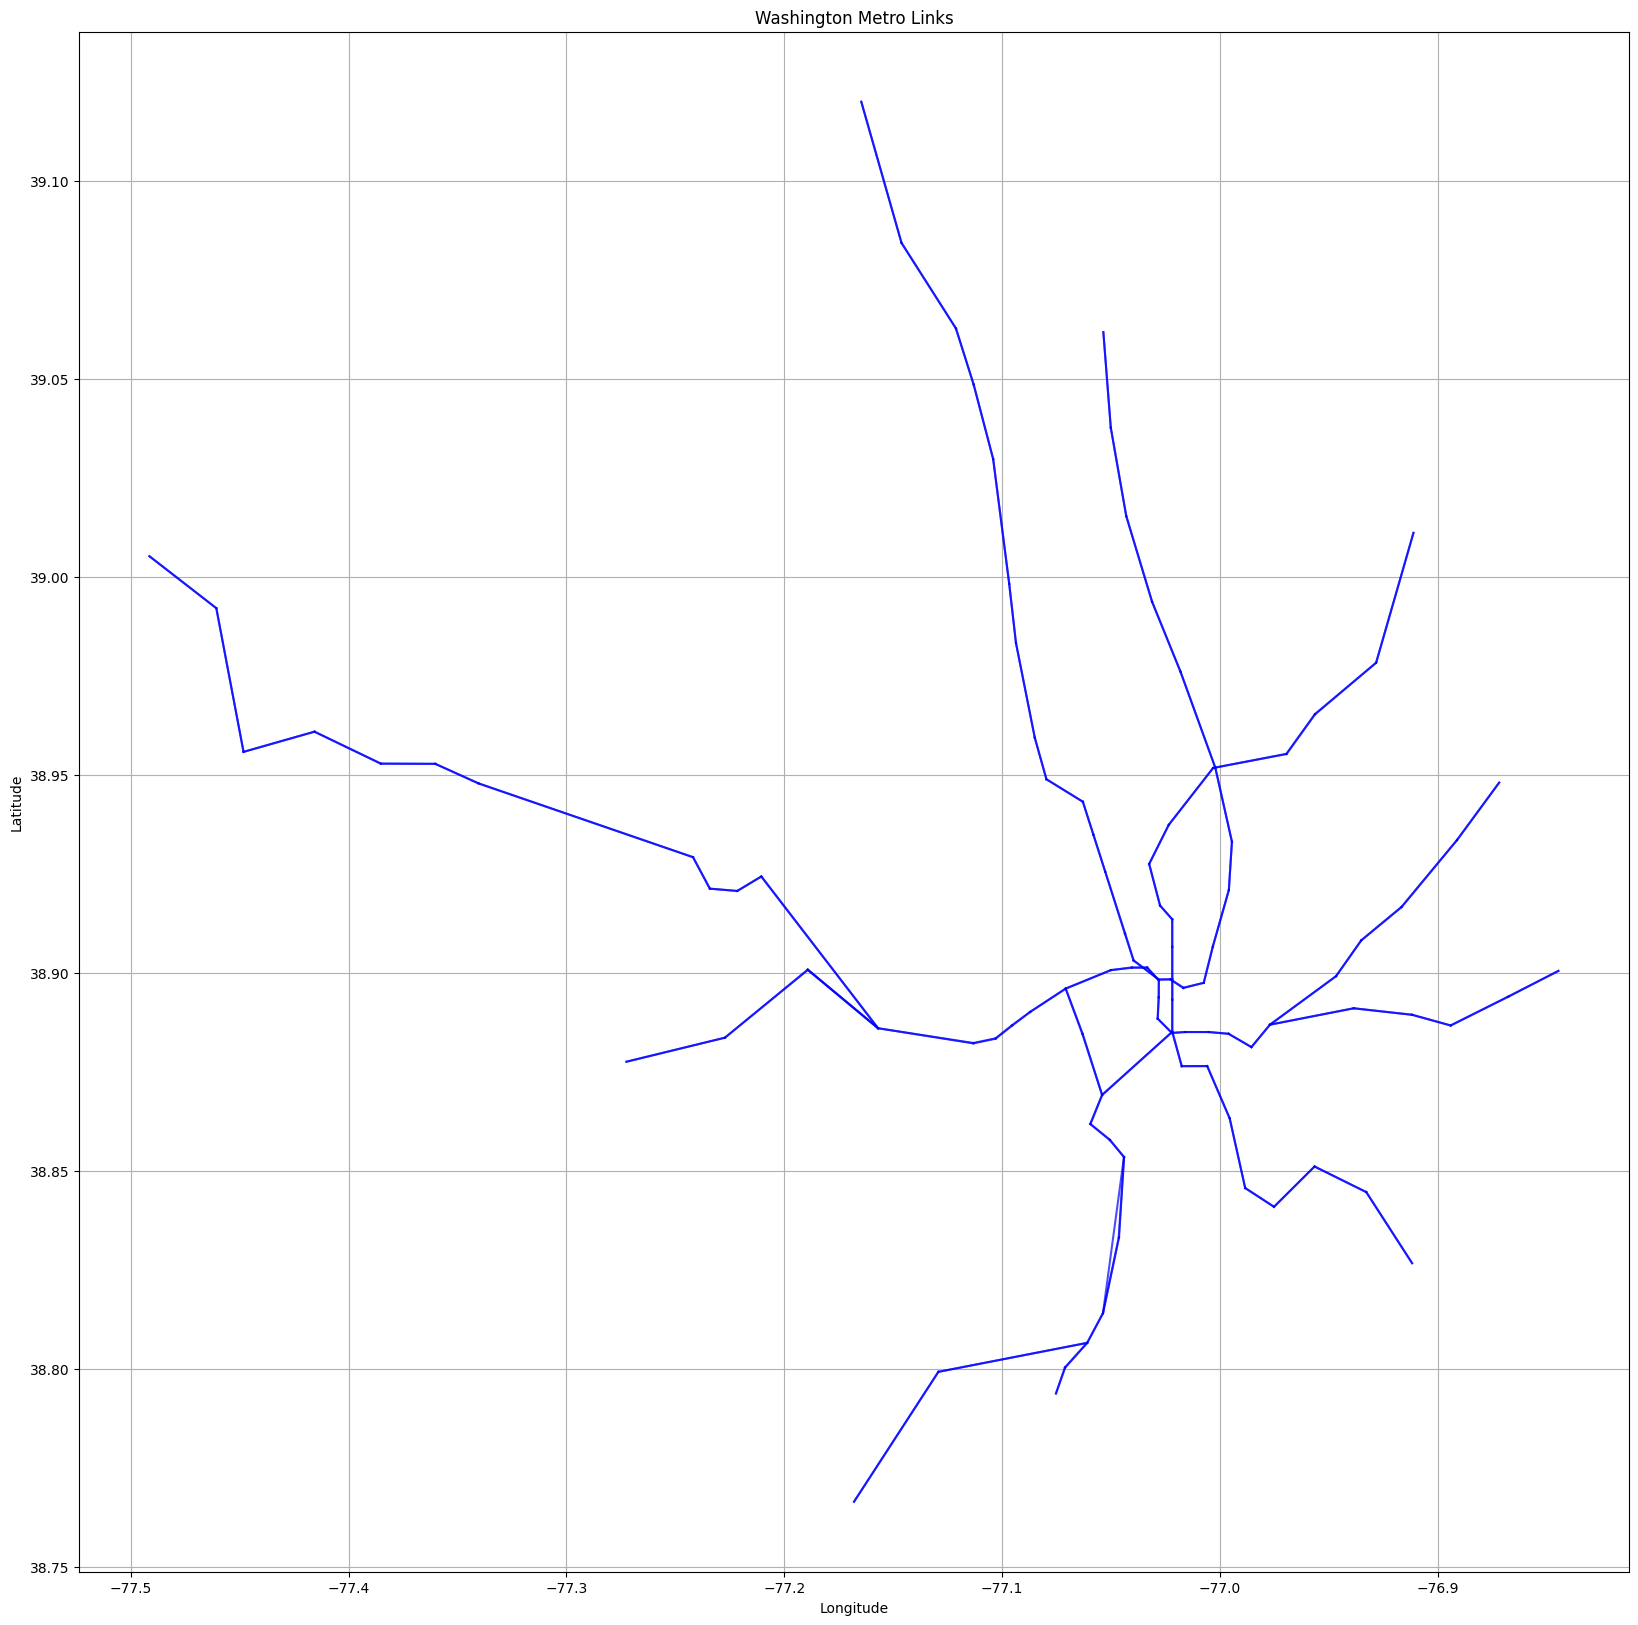

In [7]:
# plot the links using uniqueLinks
plt.figure(figsize=(20, 20))

# plotting the links
for i, row in uniqueLinks.iterrows():
    start_lon = row['start_lon']
    start_lat = row['start_lat']
    end_lon = row['end_lon']
    end_lat = row['end_lat']
    
    plt.plot([start_lon, end_lon], [start_lat, end_lat], color='blue', alpha=0.7)


plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Washington Metro Links')
plt.grid(True)
plt.show()

In [8]:
# saving the uniqueLinks with the coordinates to a csv file
uniqueLinks.to_csv('static/unique_links_with_coordinates.csv', index=False)

In [9]:
# saving the uniqueStops with the coordinates to a csv file
uniqueStops.to_csv('static/unique_stops_with_coordinates.csv', index=False)